# Scoring Application

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split, learning_curve
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
sns.set()
from pickle import dump

* Chargement du Dataset

In [2]:
df = pd.read_csv('bank.csv', sep=';', na_values='Unknow')
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [3]:
db = df.copy()

In [4]:
db = db.drop('CLIENTNUM',axis=1).dropna(axis=0)

* Selection des Variables Retenu Après l'Analyse Exploratoire

In [5]:
db

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [6]:
y = db['Attrition_Flag']
db = db.select_dtypes(exclude=object)[
    ['Total_Ct_Chng_Q4_Q1','Total_Trans_Amt','Total_Revolving_Bal','Total_Relationship_Count',
     'Total_Amt_Chng_Q4_Q1','Total_Trans_Ct','Contacts_Count_12_mon']
]

In [7]:
db

,Total_Ct_Chng_Q4_Q1,Total_Trans_Amt,Total_Revolving_Bal,Total_Relationship_Count,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Contacts_Count_12_mon
0,1.625,1144,777,5,1.335,42,3
1,3.714,1291,864,6,1.541,33,2
2,2.333,1887,0,4,2.594,20,0
3,2.333,1171,2517,3,1.405,20,1
4,2.500,816,0,5,2.175,28,0
...,...,...,...,...,...,...,...
10122,0.857,15476,1851,3,0.703,117,3
10123,0.683,8764,2186,4,0.804,69,3
10124,0.818,10291,0,5,0.819,60,4
10125,0.722,8395,0,4,0.535,62,3


* Normalisation des Valeurs

In [8]:
normaliser = RobustScaler()
normaliser.fit(db)
db[db.columns] = normaliser.transform(db)
y = y.replace(['Existing Customer','Attrited Customer'],[0,1])

In [9]:
y.shape

(10127,)

In [10]:
db

,Total_Ct_Chng_Q4_Q1,Total_Trans_Amt,Total_Revolving_Bal,Total_Relationship_Count,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Contacts_Count_12_mon
0,3.911017,-1.065558,-0.350175,0.5,2.627193,-0.694444,1.0
1,12.762712,-1.008702,-0.289123,1.0,3.530702,-0.944444,0.0
2,6.911017,-0.778186,-0.895439,0.0,8.149123,-1.305556,-2.0
3,6.911017,-1.055115,0.870877,-0.5,2.934211,-1.305556,-1.0
4,7.618644,-1.192419,-0.895439,0.5,6.311404,-1.083333,-2.0
...,...,...,...,...,...,...,...
10122,0.656780,4.477664,0.403509,-0.5,-0.144737,1.388889,1.0
10123,-0.080508,1.881648,0.638596,0.0,0.298246,0.055556,1.0
10124,0.491525,2.472249,-0.895439,0.5,0.364035,-0.194444,2.0
10125,0.084746,1.738929,-0.895439,0.0,-0.881579,-0.138889,1.0


* TRAIN_TEST_SPLIT

In [11]:
X_train, X_test, y_train, y_test = train_test_split(db,y,test_size=.3,random_state=5)

* MODELISATION

In [12]:
model = GradientBoostingClassifier(n_estimators=100,
                                   learning_rate=1.0, 
                                   max_depth=1,random_state=5)
model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=5)

In [13]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test,y_test)
print(f'Fit:',train_score)
print(f'Train:',test_score)

Fit: 0.9637415349887133
Train: 0.9519578808818691


In [14]:
y_pred = model.predict(X_test)

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      2533
           1       0.89      0.82      0.85       506

    accuracy                           0.95      3039
   macro avg       0.93      0.90      0.91      3039
weighted avg       0.95      0.95      0.95      3039



In [16]:
print(pd.DataFrame(confusion_matrix(y_test,y_pred)))

      0    1
0  2480   53
1    93  413


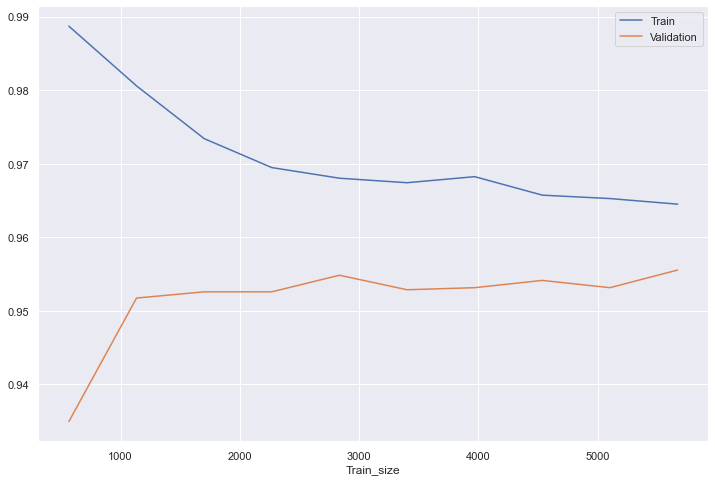

In [17]:
var, train_score, val_score = learning_curve(model,X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5)
plt.figure(figsize=(12,8))
plt.title('')
plt.plot(var, train_score.mean(axis = 1), label = 'Train')
plt.plot(var, val_score.mean(axis = 1), label = 'Validation')
plt.xlabel('Train_size')
plt.legend()
plt.show()

* Exportation du modèle

In [18]:
#Save the model
#dump(model, open('model.pkl', 'wb'))

#Save the normalizer
#dump(normaliser,open('normalizer.pkl','wb'))

In [19]:
#https://machinelearningmastery.com/how-to-save-and-load-models-and-data-preparation-in-scikit-learn-for-later-use/

In [20]:
type(X_test)

pandas.core.frame.DataFrame

In [46]:
d = pd.DataFrame(np.array([[1,2,3,4,5,6,7]]), columns=db.columns)

In [47]:
d

,Total_Ct_Chng_Q4_Q1,Total_Trans_Amt,Total_Revolving_Bal,Total_Relationship_Count,Total_Amt_Chng_Q4_Q1,Total_Trans_Ct,Contacts_Count_12_mon
0,1,2,3,4,5,6,7


In [48]:
pred = model.predict(d)

In [49]:
pred

array([0], dtype=int64)

In [5]:
val = 1.5

In [6]:
type(val)

float